# TRAFFIC CRASHES IN CHICAGO: PREDICTING THE PRIMARY CONTRIBUTORY CAUSE:

### PROJECT OVERVIEW:

There have been accidents occuring in Chicago. These accidents have resulted in severe injuries, damaged properties and even, loss of life. This has led to an increased outcry on a need for action to be taken. This has prompted the establishment of a `Road and Safety Committee`. This committee would like to known what are the main contributors of accidents in the area.

This project uses publicly available data from the City of Chicago to build a predictive model that determines the primary contributory cause of traffic accidents. Leveraging data from three datasets (Crashes, People, Vehicles), the model applies feature engineering and interpretable machine learning techniques to both predict and explain accident causes.

#### `Due to the various packages, we will import them per cell, instead of in one major cell:`

In [145]:
import pandas as pd

### Loading of the datasets:

Due to the sheer size of the datasets, we will have to load 2 of them in chunks:

In [146]:
pd.set_option('display.max_info_columns', 10000)

crashes_df = pd.read_csv("Traffic_Crashes_-_Crashes_20250618.csv")
chunks = pd.read_csv('Traffic_Crashes_-_Vehicles_20250619.csv', chunksize=100_000, low_memory=False)
chunks2 = pd.read_csv('Traffic_Crashes_-_People_20250619.csv', chunksize=100_000, low_memory=False)

# vehicle_df = pd.read_csv('Traffic_Crashes_-_Vehicles_20250619.csv', low_memory=False)
# people_df = pd.read_csv('Traffic_Crashes_-_People_20250619.csv')

Once that has been achieved, we need to concat the different chuncks to a single dataframe!

In [150]:
vehicle_df = pd.concat(chunks, ignore_index=True)
people_df = pd.concat(chunks2, ignore_index=True)

##### `Great! Now, let us review each of the dataframes to get an understanding of what we are dealing with`

Below:

In [4]:
crashes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 955854 entries, 0 to 955853
Data columns (total 48 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   CRASH_RECORD_ID                955854 non-null  object 
 1   CRASH_DATE_EST_I               69923 non-null   object 
 2   CRASH_DATE                     955854 non-null  object 
 3   POSTED_SPEED_LIMIT             955854 non-null  int64  
 4   TRAFFIC_CONTROL_DEVICE         955854 non-null  object 
 5   DEVICE_CONDITION               955854 non-null  object 
 6   WEATHER_CONDITION              955854 non-null  object 
 7   LIGHTING_CONDITION             955854 non-null  object 
 8   FIRST_CRASH_TYPE               955854 non-null  object 
 9   TRAFFICWAY_TYPE                955854 non-null  object 
 10  LANE_CNT                       199026 non-null  float64
 11  ALIGNMENT                      955854 non-null  object 
 12  ROADWAY_SURFACE_COND          

In [5]:
vehicle_df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1950130 entries, 0 to 1950129
Data columns (total 71 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   CRASH_UNIT_ID             1950130 non-null  int64  
 1   CRASH_RECORD_ID           1950130 non-null  object 
 2   CRASH_DATE                1950130 non-null  object 
 3   UNIT_NO                   1950130 non-null  object 
 4   UNIT_TYPE                 1947811 non-null  object 
 5   NUM_PASSENGERS            288660 non-null   float64
 6   VEHICLE_ID                1904432 non-null  float64
 7   CMRC_VEH_I                36224 non-null    object 
 8   MAKE                      1904427 non-null  object 
 9   MODEL                     1904282 non-null  object 
 10  LIC_PLATE_STATE           1730303 non-null  object 
 11  VEHICLE_YEAR              1603979 non-null  float64
 12  VEHICLE_DEFECT            1904432 non-null  object 
 13  VEHICLE_TYPE              1

##### Wow! We have a lot of missing values. Let us work with a threshold of 90%

In [6]:
0.9 * 1950130 

1755117.0

##### What columns have the most missing values in each dataframe?

In [7]:
vehicle_df.isna().sum().sort_values(ascending=False)

HAZMAT_REPORT_NO    1950129
MCS_REPORT_NO       1950122
HAZMAT_NAME         1950064
TRAILER2_LENGTH     1950060
WIDE_LOAD_I         1949957
                     ...   
UNIT_TYPE              2319
CRASH_RECORD_ID           0
UNIT_NO                   0
CRASH_DATE                0
CRASH_UNIT_ID             0
Length: 71, dtype: int64

#### Let us look at this in percentages to understand it better!!!

In [8]:
# calculating vehicles_nulls
vehicles_nulls = vehicle_df.isna().sum()
vehicles_null_percent = vehicles_nulls[vehicles_nulls>0] / len(vehicle_df)
vehicles_null_percent.to_frame('% Null')

,% Null
UNIT_TYPE,0.001189
NUM_PASSENGERS,0.851979
VEHICLE_ID,0.023433
CMRC_VEH_I,0.981425
MAKE,0.023436
...,...
CARGO_BODY_TYPE,0.992083
LOAD_TYPE,0.992438
HAZMAT_OUT_OF_SERVICE_I,0.993078
MCS_OUT_OF_SERVICE_I,0.992955


#### Okay. We can now identify the columns that have more than 90% of moissing values. We will then add them to a variable(list)!!

In [9]:
vehicle_index_label = vehicles_null_percent[vehicles_null_percent>.90].index.tolist()
vehicle_index_label

['CMRC_VEH_I',
 'FIRE_I',
 'EXCEED_SPEED_LIMIT_I',
 'TOWED_BY',
 'TOWED_TO',
 'AREA_00_I',
 'AREA_03_I',
 'AREA_04_I',
 'AREA_09_I',
 'CMV_ID',
 'USDOT_NO',
 'CCMC_NO',
 'ILCC_NO',
 'COMMERCIAL_SRC',
 'GVWR',
 'CARRIER_NAME',
 'CARRIER_STATE',
 'CARRIER_CITY',
 'HAZMAT_PLACARDS_I',
 'HAZMAT_NAME',
 'UN_NO',
 'HAZMAT_PRESENT_I',
 'HAZMAT_REPORT_I',
 'HAZMAT_REPORT_NO',
 'MCS_REPORT_I',
 'MCS_REPORT_NO',
 'HAZMAT_VIO_CAUSE_CRASH_I',
 'MCS_VIO_CAUSE_CRASH_I',
 'IDOT_PERMIT_NO',
 'WIDE_LOAD_I',
 'TRAILER1_WIDTH',
 'TRAILER2_WIDTH',
 'TRAILER1_LENGTH',
 'TRAILER2_LENGTH',
 'TOTAL_VEHICLE_LENGTH',
 'AXLE_CNT',
 'VEHICLE_CONFIG',
 'CARGO_BODY_TYPE',
 'LOAD_TYPE',
 'HAZMAT_OUT_OF_SERVICE_I',
 'MCS_OUT_OF_SERVICE_I',
 'HAZMAT_CLASS']

#### With this list, we can proceed to easily remove the features from the overall dataframe:

In [10]:
vehicle_df = vehicle_df.drop(columns=vehicle_index_label, axis=1)

### `Confirm the change has reflected:`

In [11]:
vehicle_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1950130 entries, 0 to 1950129
Data columns (total 29 columns):
 #   Column               Dtype  
---  ------               -----  
 0   CRASH_UNIT_ID        int64  
 1   CRASH_RECORD_ID      object 
 2   CRASH_DATE           object 
 3   UNIT_NO              object 
 4   UNIT_TYPE            object 
 5   NUM_PASSENGERS       float64
 6   VEHICLE_ID           float64
 7   MAKE                 object 
 8   MODEL                object 
 9   LIC_PLATE_STATE      object 
 10  VEHICLE_YEAR         float64
 11  VEHICLE_DEFECT       object 
 12  VEHICLE_TYPE         object 
 13  VEHICLE_USE          object 
 14  TRAVEL_DIRECTION     object 
 15  MANEUVER             object 
 16  TOWED_I              object 
 17  OCCUPANT_CNT         float64
 18  AREA_01_I            object 
 19  AREA_02_I            object 
 20  AREA_05_I            object 
 21  AREA_06_I            object 
 22  AREA_07_I            object 
 23  AREA_08_I            object 
 24

### Repeat the steps above on the other 2 datasets:

In [12]:
people_df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2099604 entries, 0 to 2099603
Data columns (total 29 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   PERSON_ID              2099604 non-null  object 
 1   PERSON_TYPE            2099604 non-null  object 
 2   CRASH_RECORD_ID        2099604 non-null  object 
 3   VEHICLE_ID             2056381 non-null  float64
 4   CRASH_DATE             2099604 non-null  object 
 5   SEAT_NO                424095 non-null   float64
 6   CITY                   1528991 non-null  object 
 7   STATE                  1552413 non-null  object 
 8   ZIPCODE                1409001 non-null  object 
 9   SEX                    2063898 non-null  object 
 10  AGE                    1489485 non-null  float64
 11  DRIVERS_LICENSE_STATE  1230401 non-null  object 
 12  DRIVERS_LICENSE_CLASS  1020035 non-null  object 
 13  SAFETY_EQUIPMENT       2093778 non-null  object 
 14  AIRBAG_DEPLOYED   

In [13]:
0.90 * 2099604

1889643.6

In [14]:
0.1 * 2099604

209960.40000000002

In [15]:
(2099604 - 690603) / 2099604

0.6710794035446684

In [16]:
people_df.isna().sum().sort_values(ascending=False)

CELL_PHONE_USE           2098444
BAC_RESULT VALUE         2097300
EMS_RUN_NO               2065018
PEDPEDAL_VISIBILITY      2058318
PEDPEDAL_ACTION          2058245
PEDPEDAL_LOCATION        2058243
EMS_AGENCY               1893297
HOSPITAL                 1764953
SEAT_NO                  1675509
DRIVERS_LICENSE_CLASS    1079569
DRIVERS_LICENSE_STATE     869203
ZIPCODE                   690603
AGE                       610119
CITY                      570613
STATE                     547191
DRIVER_VISION             428515
DRIVER_ACTION             427833
BAC_RESULT                426945
PHYSICAL_CONDITION        426699
VEHICLE_ID                 43223
AIRBAG_DEPLOYED            41606
SEX                        35706
EJECTION                   26542
SAFETY_EQUIPMENT            5826
INJURY_CLASSIFICATION        770
PERSON_TYPE                    0
CRASH_DATE                     0
CRASH_RECORD_ID                0
PERSON_ID                      0
dtype: int64

In [17]:
# calculating nulls
nulls = people_df.isna().sum()
null_percent = nulls[nulls>0] / len(people_df)
null_percent.to_frame('% Null')

,% Null
VEHICLE_ID,0.020586
SEAT_NO,0.798012
CITY,0.271772
STATE,0.260616
ZIPCODE,0.328921
SEX,0.017006
AGE,0.290588
DRIVERS_LICENSE_STATE,0.413984
DRIVERS_LICENSE_CLASS,0.514177
SAFETY_EQUIPMENT,0.002775


In [18]:
Index_label = null_percent[null_percent>.90].index.tolist()
Index_label

['EMS_AGENCY',
 'EMS_RUN_NO',
 'PEDPEDAL_ACTION',
 'PEDPEDAL_VISIBILITY',
 'PEDPEDAL_LOCATION',
 'BAC_RESULT VALUE',
 'CELL_PHONE_USE']

In [19]:
people_df = people_df.drop(columns=Index_label, axis=1)

In [20]:
people_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2099604 entries, 0 to 2099603
Data columns (total 22 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   PERSON_ID              object 
 1   PERSON_TYPE            object 
 2   CRASH_RECORD_ID        object 
 3   VEHICLE_ID             float64
 4   CRASH_DATE             object 
 5   SEAT_NO                float64
 6   CITY                   object 
 7   STATE                  object 
 8   ZIPCODE                object 
 9   SEX                    object 
 10  AGE                    float64
 11  DRIVERS_LICENSE_STATE  object 
 12  DRIVERS_LICENSE_CLASS  object 
 13  SAFETY_EQUIPMENT       object 
 14  AIRBAG_DEPLOYED        object 
 15  EJECTION               object 
 16  INJURY_CLASSIFICATION  object 
 17  HOSPITAL               object 
 18  DRIVER_ACTION          object 
 19  DRIVER_VISION          object 
 20  PHYSICAL_CONDITION     object 
 21  BAC_RESULT             object 
dtypes: float64(3), obj

In [21]:
crashes_nulls = crashes_df.isna().sum()
crashes_nulls_percent = crashes_nulls[crashes_nulls>0] / len(crashes_df)
crashes_nulls_percent.to_frame('% Null')

,% Null
CRASH_DATE_EST_I,0.926848
LANE_CNT,0.791782
REPORT_TYPE,0.032197
INTERSECTION_RELATED_I,0.770079
NOT_RIGHT_OF_WAY_I,0.954763
HIT_AND_RUN_I,0.686396
STREET_DIRECTION,0.000004
STREET_NAME,0.000001
BEAT_OF_OCCURRENCE,0.000005
PHOTOS_TAKEN_I,0.986049


In [22]:
crashes_index_level = crashes_nulls_percent[crashes_nulls_percent>.90].index.tolist()
crashes_index_level

['CRASH_DATE_EST_I',
 'NOT_RIGHT_OF_WAY_I',
 'PHOTOS_TAKEN_I',
 'STATEMENTS_TAKEN_I',
 'DOORING_I',
 'WORK_ZONE_I',
 'WORK_ZONE_TYPE',
 'WORKERS_PRESENT_I']

In [23]:
crashes_df = crashes_df.drop(columns=crashes_index_level, axis=1)

## Now that we have succefully dropped columns with a large number of missing values, we can now merge the 3 datasets into one. Use `merge`:

In [24]:
# merging all three databases into 1, observing shape and previewing data 
merged = pd.merge(left=crashes_df, right = vehicle_df, left_on='CRASH_RECORD_ID', right_on="CRASH_RECORD_ID", how='left')
people_df_valid = people_df.dropna(subset=['VEHICLE_ID'])
df_merged = pd.merge(left=merged, right=people_df_valid, left_on = 'VEHICLE_ID', right_on='VEHICLE_ID', how='left')
print(df_merged.shape)
df_merged.head()

(2352001, 89)


,CRASH_RECORD_ID_x,CRASH_DATE_x,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,LANE_CNT,...,DRIVERS_LICENSE_CLASS,SAFETY_EQUIPMENT,AIRBAG_DEPLOYED,EJECTION,INJURY_CLASSIFICATION,HOSPITAL,DRIVER_ACTION,DRIVER_VISION,PHYSICAL_CONDITION,BAC_RESULT
0,01184614b08579d6befa7734427e750d0f10e79dc0aa42...,04/04/2025 01:57:00 AM,15,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",ANGLE,PARKING LOT,NaN,...,NaN,SAFETY BELT USED,NOT APPLICABLE,NONE,NO INDICATION OF INJURY,NaN,UNKNOWN,NOT OBSCURED,NORMAL,TEST NOT OFFERED
1,01184614b08579d6befa7734427e750d0f10e79dc0aa42...,04/04/2025 01:57:00 AM,15,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",ANGLE,PARKING LOT,NaN,...,NaN,SAFETY BELT USED,NOT APPLICABLE,NONE,NO INDICATION OF INJURY,NaN,UNKNOWN,NOT OBSCURED,NORMAL,TEST NOT OFFERED
2,01db2b5a81860ebd2fa3f4564ba0de00508847313ce23a...,04/24/2025 08:40:00 PM,10,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,REAR TO SIDE,PARKING LOT,NaN,...,D,SAFETY BELT USED,DID NOT DEPLOY,NONE,NO INDICATION OF INJURY,NaN,NONE,NOT OBSCURED,NORMAL,TEST NOT OFFERED
3,01db2b5a81860ebd2fa3f4564ba0de00508847313ce23a...,04/24/2025 08:40:00 PM,10,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,REAR TO SIDE,PARKING LOT,NaN,...,NaN,SAFETY BELT USED,DID NOT DEPLOY,NONE,NO INDICATION OF INJURY,NaN,NONE,NOT OBSCURED,NORMAL,TEST NOT OFFERED
4,0583b2385710470c0a1bc80417d095512e3d04d6f26158...,04/24/2025 05:45:00 AM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAWN,TURNING,NOT DIVIDED,NaN,...,NaN,USAGE UNKNOWN,DEPLOYMENT UNKNOWN,NONE,NO INDICATION OF INJURY,NaN,FAILED TO YIELD,UNKNOWN,UNKNOWN,TEST NOT OFFERED


#### Just confirm the status of our newly created dataframe:

In [25]:
df_merged.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2352001 entries, 0 to 2352000
Data columns (total 89 columns):
 #   Column                         Non-Null Count    Dtype  
---  ------                         --------------    -----  
 0   CRASH_RECORD_ID_x              2352001 non-null  object 
 1   CRASH_DATE_x                   2352001 non-null  object 
 2   POSTED_SPEED_LIMIT             2352001 non-null  int64  
 3   TRAFFIC_CONTROL_DEVICE         2352001 non-null  object 
 4   DEVICE_CONDITION               2352001 non-null  object 
 5   WEATHER_CONDITION              2352001 non-null  object 
 6   LIGHTING_CONDITION             2352001 non-null  object 
 7   FIRST_CRASH_TYPE               2352001 non-null  object 
 8   TRAFFICWAY_TYPE                2352001 non-null  object 
 9   LANE_CNT                       494081 non-null   float64
 10  ALIGNMENT                      2352001 non-null  object 
 11  ROADWAY_SURFACE_COND           2352001 non-null  object 
 12  ROAD_DEFECT   

In [26]:
0.90 * 2352001 

2116800.9

In [27]:
0.15 * 2352001

352800.14999999997

### Now that we have merged the 3, we have some more cleaning to do. Let us start with dropping the columns with large values of missing data:

In [28]:
# df_merged.isna().sum().sort_values(ascending=False)
with pd.option_context('display.max_rows', None):
    print(df_merged.isna().sum().sort_values(ascending=False))

AREA_99_I                        2109904
AREA_10_I                        2090725
HOSPITAL                         2042156
TOWED_I                          2023190
AREA_08_I                        2022553
AREA_07_I                        1995351
AREA_05_I                        1986129
AREA_06_I                        1970644
AREA_02_I                        1964316
SEAT_NO                          1928060
AREA_12_I                        1871769
LANE_CNT                         1857920
AREA_11_I                        1853286
INTERSECTION_RELATED_I           1762363
AREA_01_I                        1696565
NUM_PASSENGERS                   1660898
HIT_AND_RUN_I                    1636343
DRIVERS_LICENSE_CLASS            1332729
DRIVERS_LICENSE_STATE            1122557
ZIPCODE                           973667
AGE                               900353
CITY                              861523
STATE                             837755
BAC_RESULT                        720292
DRIVER_ACTION   

In [29]:
""" 
'AREA_99_I',
'AREA_10_I',
'HOSPITAL',
'TOWED_I',
'AREA_08_I',
'AREA_07_I',
'AREA_05_I',
'AREA_06_I',
'AREA_02_I',
'SEAT_NO',
'AREA_12_I',
'LANE_CNT',
'AREA_11_I',
'INTERSECTION_RELATED_I',
'AREA_01_I',
'NUM_PASSENGERS',
'HIT_AND_RUN_I'
"""
large_nulls = ['AREA_99_I',
'AREA_10_I',
'HOSPITAL',
'TOWED_I',
'AREA_08_I',
'AREA_07_I',
'AREA_05_I',
'AREA_06_I',
'AREA_02_I',
'SEAT_NO',
'AREA_12_I',
'LANE_CNT',
'AREA_11_I',
'INTERSECTION_RELATED_I',
'AREA_01_I',
'NUM_PASSENGERS',
'HIT_AND_RUN_I']

### Dropping Columns due to the high number of missing values (85% criteria used)

In [30]:
df_merged = df_merged.drop(columns=large_nulls, axis=1)

In [31]:
df_merged.columns

Index(['CRASH_RECORD_ID_x', 'CRASH_DATE_x', 'POSTED_SPEED_LIMIT',
       'TRAFFIC_CONTROL_DEVICE', 'DEVICE_CONDITION', 'WEATHER_CONDITION',
       'LIGHTING_CONDITION', 'FIRST_CRASH_TYPE', 'TRAFFICWAY_TYPE',
       'ALIGNMENT', 'ROADWAY_SURFACE_COND', 'ROAD_DEFECT', 'REPORT_TYPE',
       'CRASH_TYPE', 'DAMAGE', 'DATE_POLICE_NOTIFIED',
       'PRIM_CONTRIBUTORY_CAUSE', 'SEC_CONTRIBUTORY_CAUSE', 'STREET_NO',
       'STREET_DIRECTION', 'STREET_NAME', 'BEAT_OF_OCCURRENCE', 'NUM_UNITS',
       'MOST_SEVERE_INJURY', 'INJURIES_TOTAL', 'INJURIES_FATAL',
       'INJURIES_INCAPACITATING', 'INJURIES_NON_INCAPACITATING',
       'INJURIES_REPORTED_NOT_EVIDENT', 'INJURIES_NO_INDICATION',
       'INJURIES_UNKNOWN', 'CRASH_HOUR', 'CRASH_DAY_OF_WEEK', 'CRASH_MONTH',
       'LATITUDE', 'LONGITUDE', 'LOCATION', 'CRASH_UNIT_ID', 'CRASH_DATE_y',
       'UNIT_NO', 'UNIT_TYPE', 'VEHICLE_ID', 'MAKE', 'MODEL',
       'LIC_PLATE_STATE', 'VEHICLE_YEAR', 'VEHICLE_DEFECT', 'VEHICLE_TYPE',
       'VEHICLE_USE', 'TR

In [32]:
"""
 'CRASH_DATE_x', 'POSTED_SPEED_LIMIT',
       'TRAFFIC_CONTROL_DEVICE', 'DEVICE_CONDITION', 'WEATHER_CONDITION',
       'LIGHTING_CONDITION',  'TRAFFICWAY_TYPE',
       'ALIGNMENT', 'ROADWAY_SURFACE_COND', 'ROAD_DEFECT', 'PRIM_CONTRIBUTORY_CAUSE', 'SEC_CONTRIBUTORY_CAUSE', 'STREET_NO',
       'STREET_DIRECTION', 'STREET_NAME', 'BEAT_OF_OCCURRENCE',  'CRASH_HOUR', 'CRASH_DAY_OF_WEEK', 'CRASH_MONTH', 'LATITUDE', 'LONGITUDE', 'LOCATION', 'CRASH_DATE_y',
       'UNIT_TYPE', 'VEHICLE_ID', 'MAKE', 'MODEL',
       'LIC_PLATE_STATE', 'VEHICLE_YEAR', 'VEHICLE_DEFECT', 'VEHICLE_TYPE',
       'VEHICLE_USE', 'MANEUVER', 'OCCUPANT_CNT', 'PERSON_TYPE', 'CRASH_DATE', 'CITY', 'STATE', 'ZIPCODE', 'SEX', 'AGE',
       'DRIVERS_LICENSE_STATE', 'DRIVERS_LICENSE_CLASS', 'DRIVER_ACTION', 'DRIVER_VISION', 'PHYSICAL_CONDITION'
"""

"\n 'CRASH_DATE_x', 'POSTED_SPEED_LIMIT',\n       'TRAFFIC_CONTROL_DEVICE', 'DEVICE_CONDITION', 'WEATHER_CONDITION',\n       'LIGHTING_CONDITION',  'TRAFFICWAY_TYPE',\n       'ALIGNMENT', 'ROADWAY_SURFACE_COND', 'ROAD_DEFECT', 'PRIM_CONTRIBUTORY_CAUSE', 'SEC_CONTRIBUTORY_CAUSE', 'STREET_NO',\n       'STREET_DIRECTION', 'STREET_NAME', 'BEAT_OF_OCCURRENCE',  'CRASH_HOUR', 'CRASH_DAY_OF_WEEK', 'CRASH_MONTH', 'LATITUDE', 'LONGITUDE', 'LOCATION', 'CRASH_DATE_y',\n       'UNIT_TYPE', 'VEHICLE_ID', 'MAKE', 'MODEL',\n       'LIC_PLATE_STATE', 'VEHICLE_YEAR', 'VEHICLE_DEFECT', 'VEHICLE_TYPE',\n       'VEHICLE_USE', 'MANEUVER', 'OCCUPANT_CNT', 'PERSON_TYPE', 'CRASH_DATE', 'CITY', 'STATE', 'ZIPCODE', 'SEX', 'AGE',\n       'DRIVERS_LICENSE_STATE', 'DRIVERS_LICENSE_CLASS', 'DRIVER_ACTION', 'DRIVER_VISION', 'PHYSICAL_CONDITION'\n"

### Next, we can drop columns based on our knowledge of the dataset and that particular domain. In this case, we have a basic understanding of what can be considered relevant and what can't:

In [33]:
domain_knowledge = ['CRASH_DATE_x', 'POSTED_SPEED_LIMIT','TRAFFIC_CONTROL_DEVICE', 'DEVICE_CONDITION', 'WEATHER_CONDITION', 'LIGHTING_CONDITION',  'TRAFFICWAY_TYPE', 'ALIGNMENT', 'ROADWAY_SURFACE_COND', 'ROAD_DEFECT', 'PRIM_CONTRIBUTORY_CAUSE', 'SEC_CONTRIBUTORY_CAUSE', 'STREET_NO', 'STREET_DIRECTION', 'STREET_NAME', 'BEAT_OF_OCCURRENCE',  'CRASH_HOUR', 'CRASH_DAY_OF_WEEK', 'CRASH_MONTH', 'CRASH_DATE_y', 'UNIT_TYPE', 'VEHICLE_ID', 'MAKE', 'MODEL', 'LIC_PLATE_STATE', 'VEHICLE_YEAR', 'VEHICLE_DEFECT', 'VEHICLE_TYPE',
       'VEHICLE_USE', 'MANEUVER', 'OCCUPANT_CNT', 'PERSON_TYPE', 'CRASH_DATE', 'CITY', 'STATE', 'ZIPCODE', 'SEX', 'AGE', 'DRIVERS_LICENSE_STATE', 'DRIVERS_LICENSE_CLASS', 'DRIVER_ACTION', 'DRIVER_VISION', 'PHYSICAL_CONDITION']

In [34]:
drop_domain_knowledge = []
for col in df_merged.columns:
    if col not in domain_knowledge:
        drop_domain_knowledge.append(col)

In [35]:
drop_domain_knowledge

['CRASH_RECORD_ID_x',
 'FIRST_CRASH_TYPE',
 'REPORT_TYPE',
 'CRASH_TYPE',
 'DAMAGE',
 'DATE_POLICE_NOTIFIED',
 'NUM_UNITS',
 'MOST_SEVERE_INJURY',
 'INJURIES_TOTAL',
 'INJURIES_FATAL',
 'INJURIES_INCAPACITATING',
 'INJURIES_NON_INCAPACITATING',
 'INJURIES_REPORTED_NOT_EVIDENT',
 'INJURIES_NO_INDICATION',
 'INJURIES_UNKNOWN',
 'LATITUDE',
 'LONGITUDE',
 'LOCATION',
 'CRASH_UNIT_ID',
 'UNIT_NO',
 'TRAVEL_DIRECTION',
 'FIRST_CONTACT_POINT',
 'PERSON_ID',
 'CRASH_RECORD_ID_y',
 'SAFETY_EQUIPMENT',
 'AIRBAG_DEPLOYED',
 'EJECTION',
 'INJURY_CLASSIFICATION',
 'BAC_RESULT']

In [36]:
df_merged['BAC_RESULT'].value_counts()

BAC_RESULT
TEST NOT OFFERED                   1608479
TEST REFUSED                         16596
TEST PERFORMED, RESULTS UNKNOWN       3726
TEST TAKEN                            2908
Name: count, dtype: int64

### Dropping Columns based on domain knowledge:

In [37]:
df_merged = df_merged.drop(columns=drop_domain_knowledge, axis=1)

### Again, confirm if the changes have taken effect:

In [38]:
df_merged.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2352001 entries, 0 to 2352000
Data columns (total 43 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   CRASH_DATE_x             2352001 non-null  object 
 1   POSTED_SPEED_LIMIT       2352001 non-null  int64  
 2   TRAFFIC_CONTROL_DEVICE   2352001 non-null  object 
 3   DEVICE_CONDITION         2352001 non-null  object 
 4   WEATHER_CONDITION        2352001 non-null  object 
 5   LIGHTING_CONDITION       2352001 non-null  object 
 6   TRAFFICWAY_TYPE          2352001 non-null  object 
 7   ALIGNMENT                2352001 non-null  object 
 8   ROADWAY_SURFACE_COND     2352001 non-null  object 
 9   ROAD_DEFECT              2352001 non-null  object 
 10  PRIM_CONTRIBUTORY_CAUSE  2352001 non-null  object 
 11  SEC_CONTRIBUTORY_CAUSE   2352001 non-null  object 
 12  STREET_NO                2352001 non-null  int64  
 13  STREET_DIRECTION         2351993 non-null 

### Dropping Redundant Columns: 

In [39]:
redundant_cols = ['CRASH_DATE_x', 'CRASH_DATE_y']

df_merged = df_merged.drop(columns=redundant_cols, axis=1)

df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2352001 entries, 0 to 2352000
Data columns (total 41 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   POSTED_SPEED_LIMIT       int64  
 1   TRAFFIC_CONTROL_DEVICE   object 
 2   DEVICE_CONDITION         object 
 3   WEATHER_CONDITION        object 
 4   LIGHTING_CONDITION       object 
 5   TRAFFICWAY_TYPE          object 
 6   ALIGNMENT                object 
 7   ROADWAY_SURFACE_COND     object 
 8   ROAD_DEFECT              object 
 9   PRIM_CONTRIBUTORY_CAUSE  object 
 10  SEC_CONTRIBUTORY_CAUSE   object 
 11  STREET_NO                int64  
 12  STREET_DIRECTION         object 
 13  STREET_NAME              object 
 14  BEAT_OF_OCCURRENCE       float64
 15  CRASH_HOUR               int64  
 16  CRASH_DAY_OF_WEEK        int64  
 17  CRASH_MONTH              int64  
 18  UNIT_TYPE                object 
 19  VEHICLE_ID               float64
 20  MAKE                     object 
 21  MODEL   

# Mapping of Different Columns:

Another step in cleaning/preprocessing is mapping of the data:

For the Crash Hour column, we can group the different rows to 4 major categories. This will reduce the noise and help in working with a countable number:

In [40]:
df_merged['TIME_BINS'] = pd.cut(x=df_merged['CRASH_HOUR'], bins = [0,6,12,18,23], 
                         labels = ['Late Night/Early Morning', 
                        'Morning', 'Afternoon/Rush Hour','Late Evening'])
df_merged.head()

,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,TRAFFICWAY_TYPE,ALIGNMENT,ROADWAY_SURFACE_COND,ROAD_DEFECT,PRIM_CONTRIBUTORY_CAUSE,...,STATE,ZIPCODE,SEX,AGE,DRIVERS_LICENSE_STATE,DRIVERS_LICENSE_CLASS,DRIVER_ACTION,DRIVER_VISION,PHYSICAL_CONDITION,TIME_BINS
0,15,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",PARKING LOT,STRAIGHT AND LEVEL,"SAND, MUD, DIRT",WORN SURFACE,UNABLE TO DETERMINE,...,IN,46408,F,29.0,IN,NaN,UNKNOWN,NOT OBSCURED,NORMAL,Late Night/Early Morning
1,15,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",PARKING LOT,STRAIGHT AND LEVEL,"SAND, MUD, DIRT",WORN SURFACE,UNABLE TO DETERMINE,...,IL,NaN,M,17.0,NaN,NaN,UNKNOWN,NOT OBSCURED,NORMAL,Late Night/Early Morning
2,10,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PARKING LOT,STRAIGHT AND LEVEL,DRY,NO DEFECTS,UNABLE TO DETERMINE,...,IL,60644,M,34.0,IL,D,NONE,NOT OBSCURED,NORMAL,Late Evening
3,10,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PARKING LOT,STRAIGHT AND LEVEL,DRY,NO DEFECTS,UNABLE TO DETERMINE,...,IN,46312,M,31.0,IN,NaN,NONE,NOT OBSCURED,NORMAL,Late Evening
4,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAWN,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,NO DEFECTS,FAILING TO YIELD RIGHT-OF-WAY,...,NaN,NaN,X,NaN,NaN,NaN,FAILED TO YIELD,UNKNOWN,UNKNOWN,Late Night/Early Morning


For the Age column, instead of dealing with the different ages individually, we can group them as below:

In [42]:
df_merged['AGE_BINS'] = pd.cut(x=df_merged['AGE'], bins = [0,15,24,35,55,100], 
                         labels = ['15 & Under', '16-24', 
                        '25-35', '36-55','56+'])
df_merged.head()

,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,TRAFFICWAY_TYPE,ALIGNMENT,ROADWAY_SURFACE_COND,ROAD_DEFECT,PRIM_CONTRIBUTORY_CAUSE,...,ZIPCODE,SEX,AGE,DRIVERS_LICENSE_STATE,DRIVERS_LICENSE_CLASS,DRIVER_ACTION,DRIVER_VISION,PHYSICAL_CONDITION,TIME_BINS,AGE_BINS
0,15,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",PARKING LOT,STRAIGHT AND LEVEL,"SAND, MUD, DIRT",WORN SURFACE,UNABLE TO DETERMINE,...,46408,F,29.0,IN,NaN,UNKNOWN,NOT OBSCURED,NORMAL,Late Night/Early Morning,25-35
1,15,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",PARKING LOT,STRAIGHT AND LEVEL,"SAND, MUD, DIRT",WORN SURFACE,UNABLE TO DETERMINE,...,NaN,M,17.0,NaN,NaN,UNKNOWN,NOT OBSCURED,NORMAL,Late Night/Early Morning,16-24
2,10,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PARKING LOT,STRAIGHT AND LEVEL,DRY,NO DEFECTS,UNABLE TO DETERMINE,...,60644,M,34.0,IL,D,NONE,NOT OBSCURED,NORMAL,Late Evening,25-35
3,10,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PARKING LOT,STRAIGHT AND LEVEL,DRY,NO DEFECTS,UNABLE TO DETERMINE,...,46312,M,31.0,IN,NaN,NONE,NOT OBSCURED,NORMAL,Late Evening,25-35
4,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAWN,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,NO DEFECTS,FAILING TO YIELD RIGHT-OF-WAY,...,NaN,X,NaN,NaN,NaN,FAILED TO YIELD,UNKNOWN,UNKNOWN,Late Night/Early Morning,NaN


Same applies to the speed:

In [43]:
df_merged['POSTED_SPEED'] = pd.cut(x=df_merged['POSTED_SPEED_LIMIT'], bins = [0,15,25,40,75], 
                         labels = ['0-15', '16-25', 
                        '26-40', '41+'])
df_merged.head()

,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,TRAFFICWAY_TYPE,ALIGNMENT,ROADWAY_SURFACE_COND,ROAD_DEFECT,PRIM_CONTRIBUTORY_CAUSE,...,SEX,AGE,DRIVERS_LICENSE_STATE,DRIVERS_LICENSE_CLASS,DRIVER_ACTION,DRIVER_VISION,PHYSICAL_CONDITION,TIME_BINS,AGE_BINS,POSTED_SPEED
0,15,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",PARKING LOT,STRAIGHT AND LEVEL,"SAND, MUD, DIRT",WORN SURFACE,UNABLE TO DETERMINE,...,F,29.0,IN,NaN,UNKNOWN,NOT OBSCURED,NORMAL,Late Night/Early Morning,25-35,0-15
1,15,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",PARKING LOT,STRAIGHT AND LEVEL,"SAND, MUD, DIRT",WORN SURFACE,UNABLE TO DETERMINE,...,M,17.0,NaN,NaN,UNKNOWN,NOT OBSCURED,NORMAL,Late Night/Early Morning,16-24,0-15
2,10,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PARKING LOT,STRAIGHT AND LEVEL,DRY,NO DEFECTS,UNABLE TO DETERMINE,...,M,34.0,IL,D,NONE,NOT OBSCURED,NORMAL,Late Evening,25-35,0-15
3,10,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PARKING LOT,STRAIGHT AND LEVEL,DRY,NO DEFECTS,UNABLE TO DETERMINE,...,M,31.0,IN,NaN,NONE,NOT OBSCURED,NORMAL,Late Evening,25-35,0-15
4,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAWN,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,NO DEFECTS,FAILING TO YIELD RIGHT-OF-WAY,...,X,NaN,NaN,NaN,FAILED TO YIELD,UNKNOWN,UNKNOWN,Late Night/Early Morning,NaN,26-40


In [44]:
df_merged['TRAFFIC_CONTROL_DEVICE'].value_counts()

TRAFFIC_CONTROL_DEVICE
NO CONTROLS                 1278425
TRAFFIC SIGNAL               692604
STOP SIGN/FLASHER            248506
UNKNOWN                       97229
OTHER                         15432
YIELD                          3730
LANE USE MARKING               3111
OTHER REG. SIGN                2790
PEDESTRIAN CROSSING SIGN       1812
OTHER WARNING SIGN             1628
RAILROAD CROSSING GATE         1559
SCHOOL ZONE                    1092
FLASHING CONTROL SIGNAL        1083
DELINEATORS                     890
POLICE/FLAGMAN                  858
OTHER RAILROAD CROSSING         498
RR CROSSING SIGN                494
NO PASSING                      175
BICYCLE CROSSING SIGN            85
Name: count, dtype: int64

To the different Traffic Control Devices:

In [45]:
""" 

OTHER WARNING SIGN
RAILROAD CROSSING GATE
SCHOOL ZONE
FLASHING CONTROL SIGNAL
DELINEATORS
POLICE/FLAGMAN
OTHER RAILROAD CROSSING
RR CROSSING SIGN
NO PASSING
BICYCLE CROSSING SIGN
"""

traffic_control_map = {'NO CONTROLS': 'NO CONTROLS',
                      'TRAFFIC SIGNAL': 'TRAFFIC SIGNAL/SIGN',
                      'STOP SIGN/FLASHER': 'TRAFFIC SIGNAL/SIGN',
                      'UNKNOWN': 'UNKNOWN/OTHER',
                      'OTHER': 'UNKNOWN/OTHER',
                      'YIELD': 'UNKNOWN/OTHER',
                      'SCHOOL ZONE' : 'UNKNOWN/OTHER',
                      'LANE USE MARKING': 'UNKNOWN/OTHER',
                      'OTHER REG. SIGN': 'UNKNOWN/OTHER',
                      'PEDESTRIAN CROSSING SIGN': 'UNKNOWN/OTHER',
                      'OTHER WARNING SIGN': 'UNKNOWN/OTHER',
                      'RAILROAD CROSSING GATE': 'UNKNOWN/OTHER',
                      'OTHER WARNING SIGN': 'UNKNOWN/OTHER',
                      'FLASHING CONTROL SIGNAL': 'UNKNOWN/OTHER',
                      'DELINEATORS': 'UNKNOWN/OTHER',
                      'POLICE/FLAGMAN': 'UNKNOWN/OTHER',
                      'OTHER RAILROAD CROSSING': 'UNKNOWN/OTHER',
                      'RR CROSSING SIGN': 'UNKNOWN/OTHER',
                      'NO PASSING': 'UNKNOWN/OTHER',
                      'BICYCLE CROSSING SIGN': 'UNKNOWN/OTHER'
                      }

df_merged['TRAFFIC_CONTROL_DEVICE'] = df_merged['TRAFFIC_CONTROL_DEVICE'].map(traffic_control_map)
df_merged['TRAFFIC_CONTROL_DEVICE'].value_counts()

TRAFFIC_CONTROL_DEVICE
NO CONTROLS            1278425
TRAFFIC SIGNAL/SIGN     941110
UNKNOWN/OTHER           132466
Name: count, dtype: int64

In [46]:
df_merged.columns

Index(['POSTED_SPEED_LIMIT', 'TRAFFIC_CONTROL_DEVICE', 'DEVICE_CONDITION',
       'WEATHER_CONDITION', 'LIGHTING_CONDITION', 'TRAFFICWAY_TYPE',
       'ALIGNMENT', 'ROADWAY_SURFACE_COND', 'ROAD_DEFECT',
       'PRIM_CONTRIBUTORY_CAUSE', 'SEC_CONTRIBUTORY_CAUSE', 'STREET_NO',
       'STREET_DIRECTION', 'STREET_NAME', 'BEAT_OF_OCCURRENCE', 'CRASH_HOUR',
       'CRASH_DAY_OF_WEEK', 'CRASH_MONTH', 'UNIT_TYPE', 'VEHICLE_ID', 'MAKE',
       'MODEL', 'LIC_PLATE_STATE', 'VEHICLE_YEAR', 'VEHICLE_DEFECT',
       'VEHICLE_TYPE', 'VEHICLE_USE', 'MANEUVER', 'OCCUPANT_CNT',
       'PERSON_TYPE', 'CRASH_DATE', 'CITY', 'STATE', 'ZIPCODE', 'SEX', 'AGE',
       'DRIVERS_LICENSE_STATE', 'DRIVERS_LICENSE_CLASS', 'DRIVER_ACTION',
       'DRIVER_VISION', 'PHYSICAL_CONDITION', 'TIME_BINS', 'AGE_BINS',
       'POSTED_SPEED'],
      dtype='object')

In [47]:
df_merged['MODEL'].value_counts()

MODEL
OTHER (EXPLAIN IN NARRATIVE)     215591
UNKNOWN                          205298
CAMRY                             72990
COROLLA                           46654
CIVIC                             43704
                                  ...  
DUPAGE COACH CO.                      1
ASTRE                                 1
GT CONVERTABLE                        1
DEMCO                                 1
HENDRICKSON MANUFACTURING CO.         1
Name: count, Length: 2830, dtype: int64

In [48]:
df_merged['DEVICE_CONDITION'].value_counts()

DEVICE_CONDITION
NO CONTROLS                 1297014
FUNCTIONING PROPERLY         853786
UNKNOWN                      164371
OTHER                         18101
FUNCTIONING IMPROPERLY        11013
NOT FUNCTIONING                6753
WORN REFLECTIVE MATERIAL        696
MISSING                         267
Name: count, dtype: int64

To the device conditions:

In [49]:
device_map = {'NO CONTROLS': 'NO CONTROLS',
                      'FUNCTIONING PROPERLY': 'FUNCTIONING PROPERLY',
                      'UNKNOWN': 'NOT FUNCTIONING/UNKNOWN',
                      'OTHER': 'NOT FUNCTIONING/UNKNOWN',
                      'FUNCTIONING IMPROPERLY': 'NOT FUNCTIONING/UNKNOWN',
                      'NOT FUNCTIONING ': 'NOT FUNCTIONING/UNKNOWN',
                      'WORN REFLECTIVE MATERIAL': 'NOT FUNCTIONING/UNKNOWN',
                      'MISSING': 'NOT FUNCTIONING/UNKNOWN'}

df_merged['DEVICE_CONDITION'] = df_merged['DEVICE_CONDITION'].map(device_map)
df_merged['DEVICE_CONDITION'].value_counts()

DEVICE_CONDITION
NO CONTROLS                1297014
FUNCTIONING PROPERLY        853786
NOT FUNCTIONING/UNKNOWN     194448
Name: count, dtype: int64

Now that we have engineered new columns, we can proceed to drop the correlating previous ones:

In [50]:
engineered_cols = ['AGE', 'CRASH_HOUR', 'POSTED_SPEED_LIMIT']

df_merged = df_merged.drop(columns=engineered_cols, axis=1)

In [51]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2352001 entries, 0 to 2352000
Data columns (total 41 columns):
 #   Column                   Dtype   
---  ------                   -----   
 0   TRAFFIC_CONTROL_DEVICE   object  
 1   DEVICE_CONDITION         object  
 2   WEATHER_CONDITION        object  
 3   LIGHTING_CONDITION       object  
 4   TRAFFICWAY_TYPE          object  
 5   ALIGNMENT                object  
 6   ROADWAY_SURFACE_COND     object  
 7   ROAD_DEFECT              object  
 8   PRIM_CONTRIBUTORY_CAUSE  object  
 9   SEC_CONTRIBUTORY_CAUSE   object  
 10  STREET_NO                int64   
 11  STREET_DIRECTION         object  
 12  STREET_NAME              object  
 13  BEAT_OF_OCCURRENCE       float64 
 14  CRASH_DAY_OF_WEEK        int64   
 15  CRASH_MONTH              int64   
 16  UNIT_TYPE                object  
 17  VEHICLE_ID               float64 
 18  MAKE                     object  
 19  MODEL                    object  
 20  LIC_PLATE_STATE         

In [52]:
df_merged['STREET_NAME'].value_counts()

STREET_NAME
WESTERN AVE             65321
PULASKI RD              59854
CICERO AVE              54662
ASHLAND AVE             52257
HALSTED ST              46327
                        ...  
MAC CHESNEY CT              1
BLAKE ST                    1
INDEPENDENCE SQ             1
LAFLIN AVE                  1
WESTERN AVE OVERPASS        1
Name: count, Length: 1658, dtype: int64

In [53]:
df_merged['WEATHER_CONDITION'].value_counts()

WEATHER_CONDITION
CLEAR                       1856724
RAIN                         206809
UNKNOWN                      122669
SNOW                          73591
CLOUDY/OVERCAST               71047
OTHER                          7531
FREEZING RAIN/DRIZZLE          5742
FOG/SMOKE/HAZE                 3581
SLEET/HAIL                     2720
BLOWING SNOW                   1179
SEVERE CROSS WIND GATE          362
BLOWING SAND, SOIL, DIRT         46
Name: count, dtype: int64

Let us continue with our engineering:

Weather:

In [54]:
weather_map = {'CLEAR': 'CLEAR',
                'RAIN': 'RAIN/CLOUDY/OTHER',
                'CLOUDY/OVERCAST': 'RAIN/CLOUDY/OTHER',
                'UNKNOWN': 'RAIN/CLOUDY/OTHER',
                'OTHER ': 'RAIN/CLOUDY/OTHER',
                'SNOW': 'RAIN/CLOUDY/OTHER',
                'FREEZING RAIN/DRIZZLE': 'RAIN/CLOUDY/OTHER',
                'FOG/SMOKE/HAZE': 'RAIN/CLOUDY/OTHER',
                'SLEET/HAIL': 'RAIN/CLOUDY/OTHER',
                'BLOWING SNOW': 'RAIN/CLOUDY/OTHER',
                'SEVERE CROSS WIND GATE': 'RAIN/CLOUDY/OTHER',
                'BLOWING SAND, SOIL, DIRT': 'RAIN/CLOUDY/OTHER',
                }

df_merged['WEATHER_CONDITION'] = df_merged['WEATHER_CONDITION'].map(weather_map)
df_merged['WEATHER_CONDITION'].value_counts()

WEATHER_CONDITION
CLEAR                1856724
RAIN/CLOUDY/OTHER     487746
Name: count, dtype: int64

In [55]:
df_merged['TRAFFICWAY_TYPE'].value_counts()

TRAFFICWAY_TYPE
NOT DIVIDED                        1015435
DIVIDED - W/MEDIAN (NOT RAISED)     378757
ONE-WAY                             288405
FOUR WAY                            187168
PARKING LOT                         141687
DIVIDED - W/MEDIAN BARRIER          133894
OTHER                                60281
T-INTERSECTION                       35922
ALLEY                                30771
UNKNOWN                              25936
CENTER TURN LANE                     17786
UNKNOWN INTERSECTION TYPE             7808
RAMP                                  6847
DRIVEWAY                              6233
FIVE POINT, OR MORE                   4180
Y-INTERSECTION                        3859
TRAFFIC ROUTE                         3596
NOT REPORTED                          2147
ROUNDABOUT                             792
L-INTERSECTION                         497
Name: count, dtype: int64

Traffic Way Type:

In [56]:
traffic_map = {'NOT DIVIDED': 'NOT DIVIDED',
                'DIVIDED - W/MEDIAN (NOT RAISED)': 'DIVIDED',
                'ONE-WAY': 'ONE-WAY',
                'FOUR WAY': 'FOUR WAY',
                'PARKING LOT': 'PARKING LOT',
                'DIVIDED - W/MEDIAN BARRIER': 'DIVIDED',
                'ALLEY': 'ALLEY/OTHER',
                'OTHER': 'ALLEY/OTHER',
                'CENTER TURN LANE': 'ALLEY/OTHER',
                'Y-INTERSECTION': 'ALLEY/OTHER',
                'T-INTERSECTION': 'ALLEY/OTHER',
                'UNKNOWN': 'UNKNOWN',
                'NOT REPORTED': 'UNKNOWN',
                'UNKNOWN INTERSECTION TYPE': 'UNKNOWN',
                'RAMP': 'ALLEY/OTHER',
                'DRIVEWAY': 'ALLEY/OTHER',
                'FIVE POINT, OR MORE': 'ALLEY/OTHER',
                'TRAFFIC ROUTE': 'ALLEY/OTHER',
                'NOT REPORTED': 'ALLEY/OTHER',
                'ROUNDABOUT': 'ALLEY/OTHER',
                'L-INTERSECTION': 'ALLEY/OTHER'}

df_merged['TRAFFICWAY_TYPE'] = df_merged['TRAFFICWAY_TYPE'].map(traffic_map)
df_merged['TRAFFICWAY_TYPE'].value_counts()

TRAFFICWAY_TYPE
NOT DIVIDED    1015435
DIVIDED         512651
ONE-WAY         288405
FOUR WAY        187168
ALLEY/OTHER     172911
PARKING LOT     141687
UNKNOWN          33744
Name: count, dtype: int64

In [57]:
df_merged_nulls = df_merged.isna().sum()
df_nulls_percent = df_merged_nulls[df_merged_nulls>0] / len(df_merged)
df_nulls_percent.to_frame('% Null')

,% Null
DEVICE_CONDITION,2.871172e-03
WEATHER_CONDITION,3.201954e-03
STREET_DIRECTION,3.401359e-06
STREET_NAME,8.503398e-07
BEAT_OF_OCCURRENCE,5.102039e-06
UNIT_TYPE,9.885200e-04
VEHICLE_ID,1.942176e-02
MAKE,1.942431e-02
MODEL,1.949957e-02
LIC_PLATE_STATE,9.781076e-02


In [58]:
df_index_level = df_nulls_percent[df_nulls_percent>.90].index.tolist()
df_index_level

[]

In [59]:
df_merged.columns

Index(['TRAFFIC_CONTROL_DEVICE', 'DEVICE_CONDITION', 'WEATHER_CONDITION',
       'LIGHTING_CONDITION', 'TRAFFICWAY_TYPE', 'ALIGNMENT',
       'ROADWAY_SURFACE_COND', 'ROAD_DEFECT', 'PRIM_CONTRIBUTORY_CAUSE',
       'SEC_CONTRIBUTORY_CAUSE', 'STREET_NO', 'STREET_DIRECTION',
       'STREET_NAME', 'BEAT_OF_OCCURRENCE', 'CRASH_DAY_OF_WEEK', 'CRASH_MONTH',
       'UNIT_TYPE', 'VEHICLE_ID', 'MAKE', 'MODEL', 'LIC_PLATE_STATE',
       'VEHICLE_YEAR', 'VEHICLE_DEFECT', 'VEHICLE_TYPE', 'VEHICLE_USE',
       'MANEUVER', 'OCCUPANT_CNT', 'PERSON_TYPE', 'CRASH_DATE', 'CITY',
       'STATE', 'ZIPCODE', 'SEX', 'DRIVERS_LICENSE_STATE',
       'DRIVERS_LICENSE_CLASS', 'DRIVER_ACTION', 'DRIVER_VISION',
       'PHYSICAL_CONDITION', 'TIME_BINS', 'AGE_BINS', 'POSTED_SPEED'],
      dtype='object')

Now, we have identified our target column as the one below:
`PRIM_CONTRIBUTORY_CAUSE`. Let us find details about it:

In [60]:
df_merged['PRIM_CONTRIBUTORY_CAUSE'].value_counts()

PRIM_CONTRIBUTORY_CAUSE
UNABLE TO DETERMINE                                                                 878804
FAILING TO YIELD RIGHT-OF-WAY                                                       276427
FOLLOWING TOO CLOSELY                                                               236556
IMPROPER OVERTAKING/PASSING                                                         120200
NOT APPLICABLE                                                                      115562
FAILING TO REDUCE SPEED TO AVOID CRASH                                              108997
IMPROPER LANE USAGE                                                                  84807
IMPROPER BACKING                                                                     84345
IMPROPER TURNING/NO SIGNAL                                                           82553
DRIVING SKILLS/KNOWLEDGE/EXPERIENCE                                                  76814
DISREGARDING TRAFFIC SIGNALS                                      

In [62]:
df_merged['PRIM_CONTRIBUTORY_CAUSE'].unique()

array(['UNABLE TO DETERMINE', 'FAILING TO YIELD RIGHT-OF-WAY',
       'IMPROPER TURNING/NO SIGNAL', 'DISREGARDING TRAFFIC SIGNALS',
       'IMPROPER BACKING', 'FOLLOWING TOO CLOSELY',
       'FAILING TO REDUCE SPEED TO AVOID CRASH',
       'IMPROPER OVERTAKING/PASSING',
       'VISION OBSCURED (SIGNS, TREE LIMBS, BUILDINGS, ETC.)',
       'TURNING RIGHT ON RED', 'IMPROPER LANE USAGE',
       'OPERATING VEHICLE IN ERRATIC, RECKLESS, CARELESS, NEGLIGENT OR AGGRESSIVE MANNER',
       'NOT APPLICABLE', 'DRIVING SKILLS/KNOWLEDGE/EXPERIENCE',
       'DRIVING ON WRONG SIDE/WRONG WAY', 'DISREGARDING STOP SIGN',
       'DISREGARDING ROAD MARKINGS', 'PHYSICAL CONDITION OF DRIVER',
       'WEATHER', 'EQUIPMENT - VEHICLE CONDITION',
       'DISREGARDING OTHER TRAFFIC SIGNS',
       'UNDER THE INFLUENCE OF ALCOHOL/DRUGS (USE WHEN ARREST IS EFFECTED)',
       'DISTRACTION - FROM INSIDE VEHICLE', 'RELATED TO BUS STOP',
       'EVASIVE ACTION DUE TO ANIMAL, OBJECT, NONMOTORIST',
       'ROAD ENGINEERI

# -------------------------------------------------------------

In [ ]:
""" 
'UNABLE TO DETERMINE', 
'FAILING TO YIELD RIGHT-OF-WAY',
'IMPROPER TURNING/NO SIGNAL',
'DISREGARDING TRAFFIC SIGNALS',
'IMPROPER BACKING',
'FOLLOWING TOO CLOSELY',
'FAILING TO REDUCE SPEED TO AVOID CRASH',
'IMPROPER OVERTAKING/PASSING',
'VISION OBSCURED (SIGNS, TREE LIMBS, BUILDINGS, ETC.)',
'TURNING RIGHT ON RED',
'IMPROPER LANE USAGE',
'OPERATING VEHICLE IN ERRATIC, RECKLESS, CARELESS, NEGLIGENT OR AGGRESSIVE MANNER',
'NOT APPLICABLE', 
'DRIVING SKILLS/KNOWLEDGE/EXPERIENCE',
'DRIVING ON WRONG SIDE/WRONG WAY', 
'DISREGARDING STOP SIGN',
'DISREGARDING ROAD MARKINGS', 
'PHYSICAL CONDITION OF DRIVER',
'WEATHER', 
'EQUIPMENT - VEHICLE CONDITION',
'DISREGARDING OTHER TRAFFIC SIGNS',
'UNDER THE INFLUENCE OF ALCOHOL/DRUGS (USE WHEN ARREST IS EFFECTED)',
'DISTRACTION - FROM INSIDE VEHICLE', 
'RELATED TO BUS STOP',
'EVASIVE ACTION DUE TO ANIMAL, OBJECT, NONMOTORIST',
'ROAD ENGINEERING/SURFACE/MARKING DEFECTS', 
'ANIMAL',
'DISTRACTION - FROM OUTSIDE VEHICLE',
'CELL PHONE USE OTHER THAN TEXTING',
'DISTRACTION - OTHER ELECTRONIC DEVICE (NAVIGATION DEVICE, DVD PLAYER, ETC.)',
'HAD BEEN DRINKING (USE WHEN ARREST IS NOT MADE)',
'ROAD CONSTRUCTION/MAINTENANCE',
'TEXTING',
'OBSTRUCTED CROSSWALKS', 
'DISREGARDING YIELD SIGN',
'EXCEEDING SAFE SPEED FOR CONDITIONS',
'BICYCLE ADVANCING LEGALLY ON RED LIGHT',
'PASSING STOPPED SCHOOL BUS',
'MOTORCYCLE ADVANCING LEGALLY ON RED LIGHT',
'EXCEEDING AUTHORIZED SPEED LIMIT'
"""

Since we have a lot on the target column, we could engineer a new column:

In [63]:
primary_contributor_map = {'UNABLE TO DETERMINE': 'OTHER/UNKNOWN',
                            'FAILING TO YIELD RIGHT-OF-WAY': 'Poor Driving',
                            'IMPROPER TURNING/NO SIGNAL': 'Traffic Sign Violation',
                            'DISREGARDING TRAFFIC SIGNALS': 'Traffic Sign Violation',
                            'IMPROPER BACKING': 'Poor Driving',
                            'FOLLOWING TOO CLOSELY': 'Poor Driving',
                            'FAILING TO REDUCE SPEED TO AVOID CRASH': 'Speeding',
                            'IMPROPER OVERTAKING/PASSING': 'Poor Driving',
                            'VISION OBSCURED (SIGNS, TREE LIMBS, BUILDINGS, ETC.)': 'Distraction',
                            'TURNING RIGHT ON RED': 'Poor Driving',
                            'IMPROPER LANE USAGE': 'Poor Drivinf',
                            'OPERATING VEHICLE IN ERRATIC, RECKLESS, CARELESS, NEGLIGENT OR AGGRESSIVE MANNER': 'Poor Driving',
                            'NOT APPLICABLE': 'OTHER/UNKNOWN',
                            'DRIVING SKILLS/KNOWLEDGE/EXPERIENCE': 'Poor Driving',
                            'DRIVING ON WRONG SIDE/WRONG WAY': 'Poor Driving',
                            'DISREGARDING STOP SIGN': 'Traffic Sign Violation',
                            'DISREGARDING ROAD MARKINGS': 'Traffic Sign Violation',
                            'PHYSICAL CONDITION OF DRIVER': 'Impairment',
                            'WEATHER': 'Weather',
                            'EQUIPMENT - VEHICLE CONDITION': 'OTHER/UNKNOWN',
                            'DISREGARDING OTHER TRAFFIC SIGNS': 'Traffic Sign Violation',
                            'UNDER THE INFLUENCE OF ALCOHOL/DRUGS (USE WHEN ARREST IS EFFECTED)': 'Impairment',
                            'DISTRACTION - FROM INSIDE VEHICLE': 'Poor Driving',
                            'RELATED TO BUS STOP': 'OTHER/UNKNOWN',
                            'EVASIVE ACTION DUE TO ANIMAL, OBJECT, NONMOTORIST': 'OTHER/UNKNOWN',
                            'ROAD ENGINEERING/SURFACE/MARKING DEFECTS': 'Bad Roads',
                            'ANIMAL': 'OTHER/UNKNOWN',
                            'DISTRACTION - FROM OUTSIDE VEHICLE': 'Distraction',
                            'CELL PHONE USE OTHER THAN TEXTING': 'Distraction',
                            'DISTRACTION - OTHER ELECTRONIC DEVICE (NAVIGATION DEVICE, DVD PLAYER, ETC.)': 'Distraction',
                            'HAD BEEN DRINKING (USE WHEN ARREST IS NOT MADE)': 'Impairment',
                            'ROAD CONSTRUCTION/MAINTENANCE': 'Bad Roads',
                            'TEXTING': 'Distraction',
                            'OBSTRUCTED CROSSWALKS': 'Bad Roads', 
                            'DISREGARDING YIELD SIGN': 'Traffic Sign Violation',
                            'EXCEEDING SAFE SPEED FOR CONDITIONS': 'Speeding',
                            'BICYCLE ADVANCING LEGALLY ON RED LIGHT': 'OTHER/UNKNOWN',
                            'PASSING STOPPED SCHOOL BUS': 'OTHER/UNKNOWN',
                            'MOTORCYCLE ADVANCING LEGALLY ON RED LIGHT': 'OTHER/UNKNOWN',
                            'EXCEEDING AUTHORIZED SPEED LIMIT': 'Speeding'
                            
                            
                            
                            
                            }

df_merged['PRIM_CONTRIBUTORY_CAUSE'] = df_merged['PRIM_CONTRIBUTORY_CAUSE'].map(primary_contributor_map)
df_merged['PRIM_CONTRIBUTORY_CAUSE'].value_counts()

PRIM_CONTRIBUTORY_CAUSE
OTHER/UNKNOWN             1016695
Poor Driving               861643
Traffic Sign Violation     174039
Speeding                   118456
Poor Drivinf                84807
Weather                     32385
Impairment                  29399
Distraction                 27631
Bad Roads                    6946
Name: count, dtype: int64

In [69]:
df_merged.columns

Index(['TRAFFIC_CONTROL_DEVICE', 'DEVICE_CONDITION', 'WEATHER_CONDITION',
       'LIGHTING_CONDITION', 'TRAFFICWAY_TYPE', 'ALIGNMENT',
       'ROADWAY_SURFACE_COND', 'ROAD_DEFECT', 'PRIM_CONTRIBUTORY_CAUSE',
       'SEC_CONTRIBUTORY_CAUSE', 'STREET_NO', 'STREET_DIRECTION',
       'STREET_NAME', 'BEAT_OF_OCCURRENCE', 'CRASH_DAY_OF_WEEK', 'CRASH_MONTH',
       'UNIT_TYPE', 'VEHICLE_ID', 'MAKE', 'MODEL', 'LIC_PLATE_STATE',
       'VEHICLE_YEAR', 'VEHICLE_DEFECT', 'VEHICLE_TYPE', 'VEHICLE_USE',
       'MANEUVER', 'OCCUPANT_CNT', 'PERSON_TYPE', 'CRASH_DATE', 'CITY',
       'STATE', 'ZIPCODE', 'SEX', 'DRIVERS_LICENSE_STATE',
       'DRIVERS_LICENSE_CLASS', 'DRIVER_ACTION', 'DRIVER_VISION',
       'PHYSICAL_CONDITION', 'TIME_BINS', 'AGE_BINS', 'POSTED_SPEED'],
      dtype='object')

Now, we proceed with dropping the columns with a large number of missing values:

In [70]:
threshold = 0.95
high_freq_cols = []

for col in df_merged.columns:
    top_freq = df_merged[col].value_counts(normalize=True, dropna=False).values[0]
    if top_freq > threshold:
        high_freq_cols.append(col)

# Drop them
df_merged.drop(columns=high_freq_cols)

,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,TRAFFICWAY_TYPE,ROADWAY_SURFACE_COND,ROAD_DEFECT,PRIM_CONTRIBUTORY_CAUSE,SEC_CONTRIBUTORY_CAUSE,STREET_NO,...,ZIPCODE,SEX,DRIVERS_LICENSE_STATE,DRIVERS_LICENSE_CLASS,DRIVER_ACTION,DRIVER_VISION,PHYSICAL_CONDITION,TIME_BINS,AGE_BINS,POSTED_SPEED
0,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",PARKING LOT,"SAND, MUD, DIRT",WORN SURFACE,OTHER/UNKNOWN,UNABLE TO DETERMINE,7103,...,46408,F,IN,NaN,UNKNOWN,NOT OBSCURED,NORMAL,Late Night/Early Morning,25-35,0-15
1,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",PARKING LOT,"SAND, MUD, DIRT",WORN SURFACE,OTHER/UNKNOWN,UNABLE TO DETERMINE,7103,...,NaN,M,NaN,NaN,UNKNOWN,NOT OBSCURED,NORMAL,Late Night/Early Morning,16-24,0-15
2,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PARKING LOT,DRY,NO DEFECTS,OTHER/UNKNOWN,UNABLE TO DETERMINE,399,...,60644,M,IL,D,NONE,NOT OBSCURED,NORMAL,Late Evening,25-35,0-15
3,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PARKING LOT,DRY,NO DEFECTS,OTHER/UNKNOWN,UNABLE TO DETERMINE,399,...,46312,M,IN,NaN,NONE,NOT OBSCURED,NORMAL,Late Evening,25-35,0-15
4,TRAFFIC SIGNAL/SIGN,FUNCTIONING PROPERLY,CLEAR,DAWN,NOT DIVIDED,DRY,NO DEFECTS,Poor Driving,UNABLE TO DETERMINE,7200,...,NaN,X,NaN,NaN,FAILED TO YIELD,UNKNOWN,UNKNOWN,Late Night/Early Morning,NaN,26-40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351996,TRAFFIC SIGNAL/SIGN,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",FOUR WAY,DRY,UNKNOWN,OTHER/UNKNOWN,NOT APPLICABLE,200,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Late Evening,NaN,26-40
2351997,UNKNOWN/OTHER,NOT FUNCTIONING/UNKNOWN,RAIN/CLOUDY/OTHER,UNKNOWN,FOUR WAY,UNKNOWN,UNKNOWN,OTHER/UNKNOWN,UNABLE TO DETERMINE,320,...,60137,M,IL,D,IMPROPER TURN,UNKNOWN,UNKNOWN,Afternoon/Rush Hour,25-35,26-40
2351998,UNKNOWN/OTHER,NOT FUNCTIONING/UNKNOWN,RAIN/CLOUDY/OTHER,UNKNOWN,FOUR WAY,UNKNOWN,UNKNOWN,OTHER/UNKNOWN,UNABLE TO DETERMINE,320,...,60426,M,IL,D,IMPROPER TURN,UNKNOWN,UNKNOWN,Afternoon/Rush Hour,25-35,26-40
2351999,UNKNOWN/OTHER,NOT FUNCTIONING/UNKNOWN,RAIN/CLOUDY/OTHER,UNKNOWN,FOUR WAY,UNKNOWN,UNKNOWN,OTHER/UNKNOWN,UNABLE TO DETERMINE,320,...,60137,M,IL,D,IMPROPER TURN,UNKNOWN,UNKNOWN,Afternoon/Rush Hour,25-35,26-40


In [71]:
df_merged.columns

Index(['TRAFFIC_CONTROL_DEVICE', 'DEVICE_CONDITION', 'WEATHER_CONDITION',
       'LIGHTING_CONDITION', 'TRAFFICWAY_TYPE', 'ALIGNMENT',
       'ROADWAY_SURFACE_COND', 'ROAD_DEFECT', 'PRIM_CONTRIBUTORY_CAUSE',
       'SEC_CONTRIBUTORY_CAUSE', 'STREET_NO', 'STREET_DIRECTION',
       'STREET_NAME', 'BEAT_OF_OCCURRENCE', 'CRASH_DAY_OF_WEEK', 'CRASH_MONTH',
       'UNIT_TYPE', 'VEHICLE_ID', 'MAKE', 'MODEL', 'LIC_PLATE_STATE',
       'VEHICLE_YEAR', 'VEHICLE_DEFECT', 'VEHICLE_TYPE', 'VEHICLE_USE',
       'MANEUVER', 'OCCUPANT_CNT', 'PERSON_TYPE', 'CRASH_DATE', 'CITY',
       'STATE', 'ZIPCODE', 'SEX', 'DRIVERS_LICENSE_STATE',
       'DRIVERS_LICENSE_CLASS', 'DRIVER_ACTION', 'DRIVER_VISION',
       'PHYSICAL_CONDITION', 'TIME_BINS', 'AGE_BINS', 'POSTED_SPEED'],
      dtype='object')

Since we have some missing values on our target column, we can simply remove them by running the below:

In [72]:
df_merged = df_merged.dropna(subset=['PRIM_CONTRIBUTORY_CAUSE'])


Now, let us group our columns in categorical and numerical. Then we can see the number of missing values in each:

In [77]:
categorical = df_merged.select_dtypes(include="object").columns

numerical = df_merged.select_dtypes(include=['int64', 'float64']).columns

print(f"Total NaNs in Numerical Features: {sum(df_merged[numerical].isna().sum())}")

print(f"Total NaNs in Categorical Features: {sum(df_merged[categorical].isna().sum())}")

Total NaNs in Numerical Features: 460889
Total NaNs in Categorical Features: 8733451


We all also had some `category` items. These items can be converted into `object` types for easier working:

In [87]:
cat_dtype_cols = df_merged.select_dtypes(include='category').columns

df_merged[cat_dtype_cols] = df_merged[cat_dtype_cols].astype('object')

Now, we just replace the missing values with `Unknown` in the categorical list:

In [88]:
cat_cols = df_merged.select_dtypes(include='object').columns

for col in cat_cols:
    if df_merged[col].isna().sum() > 0:
        df_merged[col] = df_merged[col].fillna("Unknown")

Then, we can replace the mssing values in our numerical list with the median of the specific columns

In [83]:
for col in numerical:
     if df_merged[col].isna().sum() > 0:
        df_merged[col] = df_merged[col].fillna(df_merged[col].median())

In [84]:
for col in categorical:
    if df_merged[col].isna().sum() > 0:
        df_merged[col] = df_merged[col].fillna('Unknown')


As a final check, confirm that we have no missing values:

In [89]:
df_merged.isna().sum()

TRAFFIC_CONTROL_DEVICE     0
DEVICE_CONDITION           0
WEATHER_CONDITION          0
LIGHTING_CONDITION         0
TRAFFICWAY_TYPE            0
ALIGNMENT                  0
ROADWAY_SURFACE_COND       0
ROAD_DEFECT                0
PRIM_CONTRIBUTORY_CAUSE    0
SEC_CONTRIBUTORY_CAUSE     0
STREET_NO                  0
STREET_DIRECTION           0
STREET_NAME                0
BEAT_OF_OCCURRENCE         0
CRASH_DAY_OF_WEEK          0
CRASH_MONTH                0
UNIT_TYPE                  0
VEHICLE_ID                 0
MAKE                       0
MODEL                      0
LIC_PLATE_STATE            0
VEHICLE_YEAR               0
VEHICLE_DEFECT             0
VEHICLE_TYPE               0
VEHICLE_USE                0
MANEUVER                   0
OCCUPANT_CNT               0
PERSON_TYPE                0
CRASH_DATE                 0
CITY                       0
STATE                      0
ZIPCODE                    0
SEX                        0
DRIVERS_LICENSE_STATE      0
DRIVERS_LICENS

In [81]:
df_merged.columns

Index(['TRAFFIC_CONTROL_DEVICE', 'DEVICE_CONDITION', 'WEATHER_CONDITION',
       'LIGHTING_CONDITION', 'TRAFFICWAY_TYPE', 'ALIGNMENT',
       'ROADWAY_SURFACE_COND', 'ROAD_DEFECT', 'PRIM_CONTRIBUTORY_CAUSE',
       'SEC_CONTRIBUTORY_CAUSE', 'STREET_NO', 'STREET_DIRECTION',
       'STREET_NAME', 'BEAT_OF_OCCURRENCE', 'CRASH_DAY_OF_WEEK', 'CRASH_MONTH',
       'UNIT_TYPE', 'VEHICLE_ID', 'MAKE', 'MODEL', 'LIC_PLATE_STATE',
       'VEHICLE_YEAR', 'VEHICLE_DEFECT', 'VEHICLE_TYPE', 'VEHICLE_USE',
       'MANEUVER', 'OCCUPANT_CNT', 'PERSON_TYPE', 'CRASH_DATE', 'CITY',
       'STATE', 'ZIPCODE', 'SEX', 'DRIVERS_LICENSE_STATE',
       'DRIVERS_LICENSE_CLASS', 'DRIVER_ACTION', 'DRIVER_VISION',
       'PHYSICAL_CONDITION', 'TIME_BINS', 'AGE_BINS', 'POSTED_SPEED'],
      dtype='object')

In [101]:
df_merged['STATE'].unique()

array(['IN', 'IL', 'Unknown', 'MN', 'OH', 'MO', 'PA', 'FL', 'WI', 'CA',
       'NY', 'MI', 'DC', 'NV', 'XX', 'TX', 'LA', 'MA', 'WA', 'NM', 'MD',
       'NJ', 'NH', 'GA', 'AZ', 'TN', 'HI', 'NC', 'SD', 'KS', 'KY', 'OK',
       'OR', 'IA', 'CO', 'NB', 'WY', 'CT', 'SC', 'VA', 'AL', 'MS', 'WV',
       'AR', 'ID', 'UT', 'MT', 'ND', 'ME', 'AK', 'RI', 'DE', 'VT'],
      dtype=object)

We now have an idea of the final columns that we need and so, we can drop the columns that we do not need:

In [102]:
final_cols_to_drop = ['VEHICLE_ID', 'STREET_NO', 'STREET_NAME', 'STREET_DIRECTION', 'ZIPCODE', 'CRASH_DATE', 'LIC_PLATE_STATE', 'DRIVERS_LICENSE_STATE', 'MODEL']

In [103]:
df_merged = df_merged.drop(columns=final_cols_to_drop, axis=1)

In [104]:
df_merged.columns

Index(['TRAFFIC_CONTROL_DEVICE', 'DEVICE_CONDITION', 'WEATHER_CONDITION',
       'LIGHTING_CONDITION', 'TRAFFICWAY_TYPE', 'ALIGNMENT',
       'ROADWAY_SURFACE_COND', 'ROAD_DEFECT', 'PRIM_CONTRIBUTORY_CAUSE',
       'SEC_CONTRIBUTORY_CAUSE', 'BEAT_OF_OCCURRENCE', 'CRASH_DAY_OF_WEEK',
       'CRASH_MONTH', 'UNIT_TYPE', 'MAKE', 'VEHICLE_YEAR', 'VEHICLE_DEFECT',
       'VEHICLE_TYPE', 'VEHICLE_USE', 'MANEUVER', 'OCCUPANT_CNT',
       'PERSON_TYPE', 'CITY', 'STATE', 'SEX', 'DRIVERS_LICENSE_CLASS',
       'DRIVER_ACTION', 'DRIVER_VISION', 'PHYSICAL_CONDITION', 'TIME_BINS',
       'AGE_BINS', 'POSTED_SPEED'],
      dtype='object')

In [105]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2352001 entries, 0 to 2352000
Data columns (total 32 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   TRAFFIC_CONTROL_DEVICE   object 
 1   DEVICE_CONDITION         object 
 2   WEATHER_CONDITION        object 
 3   LIGHTING_CONDITION       object 
 4   TRAFFICWAY_TYPE          object 
 5   ALIGNMENT                object 
 6   ROADWAY_SURFACE_COND     object 
 7   ROAD_DEFECT              object 
 8   PRIM_CONTRIBUTORY_CAUSE  object 
 9   SEC_CONTRIBUTORY_CAUSE   object 
 10  BEAT_OF_OCCURRENCE       float64
 11  CRASH_DAY_OF_WEEK        int64  
 12  CRASH_MONTH              int64  
 13  UNIT_TYPE                object 
 14  MAKE                     object 
 15  VEHICLE_YEAR             float64
 16  VEHICLE_DEFECT           object 
 17  VEHICLE_TYPE             object 
 18  VEHICLE_USE              object 
 19  MANEUVER                 object 
 20  OCCUPANT_CNT             float64
 21  PERSON_T

In [65]:
# null_values = df_enhanced[['REPORT_TYPE', 'STREET_DIRECTION', 'STREET_NAME', 'BEAT_OF_OCCURRENCE', 'MOST_SEVERE_INJURY', 'INJURIES_TOTAL', 'INJURIES_FATAL', 'INJURIES_INCAPACITATING', 'INJURIES_NON_INCAPACITATING', 'INJURIES_REPORTED_NOT_EVIDENT', 'INJURIES_NO_INDICATION', 'INJURIES_UNKNOWN', 'LATITUDE', 'LONGITUDE', 'LOCATION']]

# for column in null_values:
#     df_enhanced[column] = df_enhanced[column].fillna('Null')
# print(df_enhanced.info())

# Great
We can now encode our columns to convert them to numeric. We shall use the `LabelEncoder`:

In [106]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

Before that, we need to identify our target variable in `y` and the rest in `X`. We shall implement the `train_test_split`:

In [107]:
from sklearn.model_selection import train_test_split

y = df_merged['PRIM_CONTRIBUTORY_CAUSE']
X = df_merged.drop(columns='PRIM_CONTRIBUTORY_CAUSE')

# y_encoded = pd.DataFrame(le.fit_transform(y))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [109]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2352001 entries, 0 to 2352000
Data columns (total 32 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   TRAFFIC_CONTROL_DEVICE   object 
 1   DEVICE_CONDITION         object 
 2   WEATHER_CONDITION        object 
 3   LIGHTING_CONDITION       object 
 4   TRAFFICWAY_TYPE          object 
 5   ALIGNMENT                object 
 6   ROADWAY_SURFACE_COND     object 
 7   ROAD_DEFECT              object 
 8   PRIM_CONTRIBUTORY_CAUSE  object 
 9   SEC_CONTRIBUTORY_CAUSE   object 
 10  BEAT_OF_OCCURRENCE       float64
 11  CRASH_DAY_OF_WEEK        int64  
 12  CRASH_MONTH              int64  
 13  UNIT_TYPE                object 
 14  MAKE                     object 
 15  VEHICLE_YEAR             float64
 16  VEHICLE_DEFECT           object 
 17  VEHICLE_TYPE             object 
 18  VEHICLE_USE              object 
 19  MANEUVER                 object 
 20  OCCUPANT_CNT             float64
 21  PERSON_T

Let us encodce our target variable:

In [108]:
y_train_enc = le.fit_transform(y_train)
y_test_enc = le.transform(y_test)

Then, we can encode our predictors:

In [113]:
label_encoders = {}
for col in X_train.select_dtypes(include='object').columns:
    le = LabelEncoder()
    X_train[col] = le.fit_transform(X_train[col].astype(str))
    X_test[col] = le.transform(X_test[col].astype(str))  # assumes all test values exist in train
    label_encoders[col] = le

## Model Creation:

We shall be creating an `XGBoost`. For the base model, we shall not have any parameters nor will there be cross validation:

In [115]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Instantiate XGBClassifier
xgb_model = XGBClassifier()


# Fit XGBClassifier
xgb_model.fit(X_train, y_train_enc)

# Predict on training and test sets
training_preds = xgb_model.predict(X_train)
test_preds = xgb_model.predict(X_test)

# Accuracy of training and test sets
training_accuracy = accuracy_score(y_train_enc, training_preds)
test_accuracy = accuracy_score(y_test_enc, test_preds)

print('Training Accuracy: {:.4}%'.format(training_accuracy * 100))
print('Validation accuracy: {:.4}%'.format(test_accuracy * 100))

Training Accuracy: 66.08%
Validation accuracy: 65.27%


### Results: The model has an accuracy of 65.27%. Since this is a multiclass classification, the accuracy is pretty solid. But, how can we get a better score?

We shall implement a tool called `Shapley Additive exPlanation (SHAP)`

In [116]:
!pip install shap

   ---------------------------------------- 0.0/545.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/545.3 kB ? eta -:--:--
   ------------------- -------------------- 262.1/545.3 kB ? eta -:--:--
   ---------------------------------------- 545.3/545.3 kB 1.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.8 MB ? eta -:--:--
   --- ------------------------------------ 0.3/2.8 MB ? eta -:--:--
   --- ------------------------------------ 0.3/2.8 MB ? eta -:--:--
   ------- -------------------------------- 0.5/2.8 MB 540.5 kB/s eta 0:00:05
   ------- -------------------------------- 0.5/2.8 MB 540.5 kB/s eta 0:00:05
   ------- -------------------------------- 0.5/2.8 MB 540.5 kB/s eta 0:00:05
   ----------- ---------------------------- 0.8/2.8 MB 550.1 kB/s eta 0:00:04
   ----------- ---------------------------- 0.8/2.8 MB 550.1 kB/s eta 0:00:04
   -------------- ---------------------


[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
# import shap
# explainer = shap.TreeExplainer(xgb_model)
# shap_values = explainer(X_test)
# shap.plots.bar(shap_values, max_display=len(X_test.columns))

Now, we can generate a summary plot. This is a display of SHAP values that reveal the relative importance of features and their actual relationships with predicted outcome.

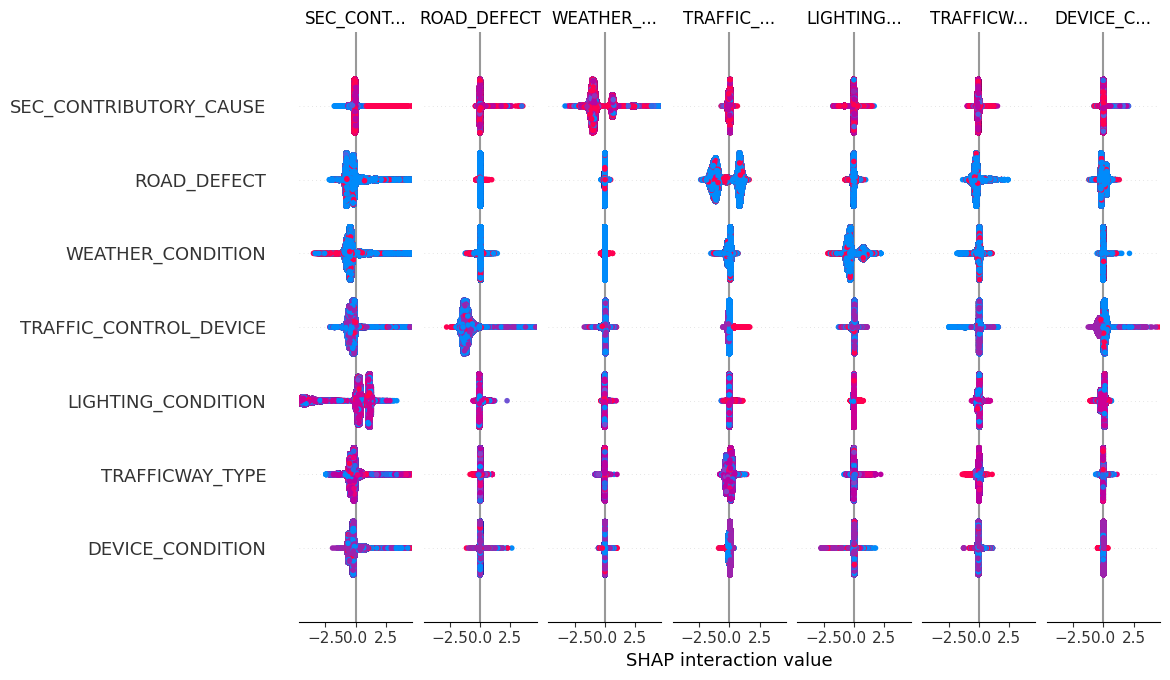

In [ ]:
import shap

explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, 
                  plot_type="layered_violin", 
                  color='coolwarm')

# HYPERPARAMETER TUNING:

How can we make the best of our model?
Let us start with providing parameters to our initialization of the model:

In [124]:
model2 = XGBClassifier(
    max_depth=6,          
    learning_rate=0.1,    
    n_estimators=300,     
    subsample=0.8,        
    colsample_bytree=0.8, 
    random_state=42)

model2.fit(X_train, y_train_enc)

# Predict on training and test sets
training_preds2 = model2.predict(X_train)
test_preds2 = model2.predict(X_test)

# Accuracy of training and test sets
training_accuracy2 = accuracy_score(y_train_enc, training_preds2)
test_accuracy2 = accuracy_score(y_test_enc, test_preds2)

print('Training Accuracy: {:.4}%'.format(training_accuracy2 * 100))
print('Validation accuracy: {:.4}%'.format(test_accuracy2 * 100))

Training Accuracy: 66.06%
Validation accuracy: 65.29%


There is a slight improvement. But again, it can be better. So let us work on that:

We can use a `RandomizedGridSearch`:

In [134]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

param_grid = {
    'max_depth': [6, 8],          
    'learning_rate': [0.1],       
    'n_estimators': [100, 200],   
    'subsample': [0.8, 1],        
    'colsample_bytree': [0.7]     
}

random_grid = RandomizedSearchCV(
    estimator=XGBClassifier(early_stopping_rounds=10),
    param_distributions=param_grid,
    scoring='accuracy',
    n_iter=20,
    cv=5,
    n_jobs=1,
    verbose=1
)

random_grid.fit(X_train, y_train_enc, eval_set=[(X_test, y_test_enc)],  # Validation data for early stopping
)

c:\Users\Stephen Kamiru\Documents\Moringa School\myenv\Lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 8 is smaller than n_iter=20. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 8 candidates, totalling 40 fits
[0]	validation_0-mlogloss:2.03707
[1]	validation_0-mlogloss:1.90200
[2]	validation_0-mlogloss:1.80647
[3]	validation_0-mlogloss:1.72660
[4]	validation_0-mlogloss:1.64882
[5]	validation_0-mlogloss:1.58463
[6]	validation_0-mlogloss:1.52587
[7]	validation_0-mlogloss:1.47456
[8]	validation_0-mlogloss:1.42906
[9]	validation_0-mlogloss:1.39082
[10]	validation_0-mlogloss:1.35535
[11]	validation_0-mlogloss:1.32285
[12]	validation_0-mlogloss:1.29519
[13]	validation_0-mlogloss:1.27144
[14]	validation_0-mlogloss:1.24826
[15]	validation_0-mlogloss:1.22845
[16]	validation_0-mlogloss:1.20880
[17]	validation_0-mlogloss:1.19262
[18]	validation_0-mlogloss:1.17758
[19]	validation_0-mlogloss:1.16491
[20]	validation_0-mlogloss:1.15230
[21]	validation_0-mlogloss:1.13985
[22]	validation_0-mlogloss:1.12880
[23]	validation_0-mlogloss:1.11820
[24]	validation_0-mlogloss:1.10851
[25]	validation_0-mlogloss:1.09958
[26]	validation_0-mlogloss:1.09168
[27]	

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=10,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           feature_weights=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints...
                                           max_delta_step=None, max_depth=None,
                                           max_leaves=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None, ...),
                   n_iter=20, n_jobs=1,
                   param_distributions={'colsample_bytree': [0.7],
                                        'learning_rate': [0.1],
                                        'max_depth': [6, 8],
                                        'n_estimators': [100, 200],
                                        'subsample': [0.8, 1]},
                   scoring='accuracy', verbose=1)

In [137]:
best_params = random_grid.best_params_

As seen above, we can now generate a model that has the aforementioned parameters:

In [ ]:
best_model = XGBClassifier(**best_params)

best_model.fit(X_train, y_train_enc)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=8,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, ...)

In [140]:
# Predict on training and test sets
training_preds_best = best_model.predict(X_train)
test_preds_best = best_model.predict(X_test)

# Accuracy of training and test sets
training_accuracy_best = accuracy_score(y_train_enc, training_preds_best)
test_accuracy_best = accuracy_score(y_test_enc, test_preds_best)

print('Training Accuracy: {:.4}%'.format(training_accuracy_best * 100))
print('Validation accuracy: {:.4}%'.format(test_accuracy_best * 100))

Training Accuracy: 67.11%
Validation accuracy: 65.73%


We now have another slight improvement, but remember, we are dealing with a multiclass classification, so the score is solid!!

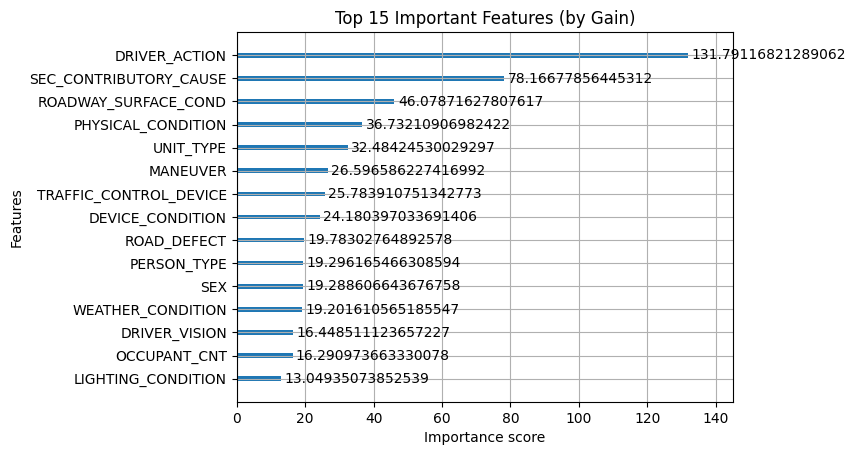

In [141]:
import matplotlib.pyplot as plt
from xgboost import plot_importance

plot_importance(best_model, max_num_features=15, importance_type='gain')
plt.title('Top 15 Important Features (by Gain)')
plt.show()

And as seen from the graph above, the most important feature was the `DRIVER_ACTION` feature!

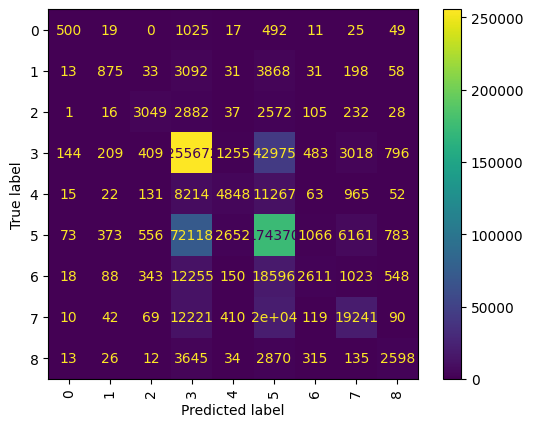

In [144]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(best_model, X_test, y_test_enc, xticks_rotation='vertical')


From the metrics above, there is a significant imbalance in classes 3 and 5.

In [149]:
importance = best_model.get_booster().get_score(importance_type='gain')
importance = sorted(importance.items(), key=lambda x: x[1], reverse=True)
print(importance[:5])  # Top 5


[('DRIVER_ACTION', 131.79116821289062), ('SEC_CONTRIBUTORY_CAUSE', 78.16677856445312), ('ROADWAY_SURFACE_COND', 46.07871627807617), ('PHYSICAL_CONDITION', 36.73210906982422), ('UNIT_TYPE', 32.48424530029297)]


## CONCLUSION:


The leading cause of accidents in chicago is `Driver Action`. This means that the drivers contribute majorly to the accidents. This might be due to their distractions or even reckless driving. 

With this insight provided, the committee can now establish methods of overcoming the above mentioned issue!